<a href="https://colab.research.google.com/github/msrana172/coursera-machine-learning/blob/master/Copy_of_Covid_19_Modeling_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Modeling Coronavirus Disease (COVID19) Spread using Data Science & Data Analytics


#### Imports for downloading data set, data manipulation and plotting

In [0]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

#### Links to raw files for Covid-19 dataset provided by CSSEGIS JHU

In [0]:
confimed_cases_file_link = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
death_cases_file_link = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
recovered_cases_file_link = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
country_cases_file_link = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv"

#### Downloading datasets into respective data frames

In [0]:
confirmed_df = pd.read_csv(confimed_cases_file_link)
print(confirmed_df.shape)
deaths_df = pd.read_csv(death_cases_file_link)
print(deaths_df.shape)
recovered_df = pd.read_csv(recovered_cases_file_link)
print(recovered_df.shape)
cases_country_df = pd.read_csv(country_cases_file_link)
print(cases_country_df.shape)

(264, 86)
(264, 86)
(250, 86)
(185, 14)


In [0]:
confirmed_df.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446


In [0]:
deaths_df.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18,18
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23,23


In [0]:
recovered_df.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,5,5,10,10,10,15,18,18,29,32,32,32,32
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,10,17,17,31,31,33,44,52,67,76,89,99,104,116,131,154,165,182,197,217


In [0]:
cases_country_df.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Australia,2020-04-13 15:41:46,-25.0000,133.0000,6351,61,1806,4484,24.945306,NaN,NaN,0.960479,36,AUS
1,Austria,2020-04-13 15:33:20,47.5162,14.5501,14018,368,7343,6307,155.644875,NaN,NaN,2.625196,40,AUT
2,Canada,2020-04-13 15:41:29,60.0010,-95.0010,24380,717,7172,16491,64.402451,NaN,NaN,2.940935,124,CAN
3,China,2020-04-13 09:36:31,30.5928,114.3055,83213,3345,78036,1832,5.923998,NaN,NaN,4.019805,156,CHN
4,Denmark,2020-04-13 15:33:20,56.0000,10.0000,6513,285,2403,3825,112.444263,NaN,NaN,4.375864,208,DNK


#### Imputing data

In [0]:
confirmed_df = confirmed_df.replace(np.nan, '', regex=True)
deaths_df = deaths_df.replace(np.nan, '', regex=True)
recovered_df = recovered_df.replace(np.nan, '', regex=True)
cases_country_df = cases_country_df.replace(np.nan, '', regex=True)

#### Viewing the columns in the dataframe - Timeseries

In [0]:
confirmed_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
       '4/9/20', '4/10/20'

## Exploratory Analysis

#### For Case Count - Global Summary

In [0]:
global_data = cases_country_df.copy().drop(['Lat','Long_','Country_Region','Last_Update'], axis = 1)
global_summary = pd.DataFrame(global_data.sum()).transpose()
global_summary.style.format("{:,.0f}")

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID
0,"1,872,073","116,098","441,820","1,314,155","9,604",0,0,738,"96,167"


#### For Chart 1 : Total Confirmed Coronavirus Cases (Globally)

In [0]:
confirmed_ts = confirmed_df.copy().drop(['Lat','Long','Country/Region','Province/State'],axis =1)
confirmed_ts_summary = confirmed_ts.sum()

In [0]:
fig_1 = go.Figure(data=go.Scatter(x=confirmed_ts_summary.index, y = confirmed_ts_summary.values, mode='lines+markers'))
fig_1.update_layout(title='Total Coronavirus Confirmed Cases (Globally)',
                  yaxis_title='Confirmed Cases', xaxis_tickangle = 315 )
fig_1.show()

### Defining a template plot function & color arrary

In [0]:
# Initializing Color Array to be used across the analysis
color_arr = px.colors.qualitative.Dark24

In [0]:
def draw_plot(ts_array, ts_label, title, colors, mode_size, line_size, x_axis_title , y_axis_title, tickangle = 0, yaxis_type = "", additional_annotations=[]):
    # initialize figure
    fig = go.Figure()
    # add all traces
    for index, ts in enumerate(ts_array):
        fig.add_trace(go.Scatter(x=ts.index,
                                 y = ts.values,
                                 name = ts_label[index],
                                 line=dict(color=colors[index], width=line_size[index]),connectgaps=True,))
    # base x_axis prop.
    x_axis_dict = dict(showline = True, 
                       showgrid = True, 
                       showticklabels = True, 
                       linecolor = 'rgb(204, 204, 204)', 
                       linewidth = 2,
                       ticks = 'outside',
                       tickfont = dict(family = 'Arial', size =12,color='rgb(82, 82, 82)',))
    # setting x_axis params
    if x_axis_title:
        x_axis_dict['title'] = x_axis_title
    
    if tickangle > 0:
        x_axis_dict['tickangle'] = tickangle
    
    # base y_axis prop.
    y_axis_dict = dict(showline = True,
                       showgrid = True,
                       showticklabels=True,
                       linecolor='rgb(204, 204, 204)',
                       linewidth=2,)
    # setting y_axis params
    if yaxis_type != "":
        y_axis_dict['type'] = yaxis_type
    
    if y_axis_title:
        y_axis_dict['title'] = y_axis_title
        
#     # uncomment legend if you want to move the legend around
#     legend= dict(x=1,
#                  y=1,
#                  traceorder="normal",
#                  font=dict(family="sans-serif",size=12,color="black"),
#                  bgcolor="LightSteelBlue",
#                  bordercolor="Black",
#                  borderwidth=2)

#updating the layout
    fig.update_layout(xaxis = x_axis_dict,
                      yaxis = y_axis_dict,
                      autosize=True,
                      margin=dict(autoexpand=False,l=100,r=20,t=110,),
                      showlegend=True,
#                       legend = legend
                     )

    # base annotations for any graph
    annotations = []
    # Title
    annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05, xanchor='left', yanchor='bottom',
                                  text=title,
                                  font=dict(family='Arial',size=16,color='rgb(37,37,37)'),showarrow=False))
    # adding annotations in params
    if len(additional_annotations) > 0:
        annotations.append(additional_annotations)
    
    #updating the layout
    fig.update_layout(annotations=annotations)

    return fig

#### For Chart 2: Covid-19 Case Status

In [0]:
confimed_agg_ts = confirmed_df.copy().drop(['Lat','Long','Country/Region','Province/State'],axis =1).sum()
death_agg_ts = deaths_df.copy().drop(['Lat','Long','Country/Region','Province/State'],axis =1).sum()
recovered_agg_ts = recovered_df.copy().drop(['Lat','Long','Country/Region','Province/State'],axis =1).sum()

#There is no timeseries data for Active cases, therefore it needs to be engineered separately
active_agg_ts = pd.Series(
    data=np.array(
        [x1 - x2 - x3  for (x1, x2, x3) in zip(confimed_agg_ts.values,death_agg_ts.values, recovered_agg_ts.values)]),
    index= confimed_agg_ts.index)

#Plot and add traces for all the aggregated timeseries

In [0]:
ts_array = [confimed_agg_ts, active_agg_ts, recovered_agg_ts, death_agg_ts]
labels = ['Confirmed', 'Active', 'Recovered', 'Deaths']
colors = [color_arr[5],  color_arr[0], color_arr[2], color_arr[3]]
mode_size = [8, 8, 12, 8]
line_size = [2, 2, 4, 2]

# Calling the draw_plot function defined above
fig_2 = draw_plot(ts_array = ts_array, 
                  ts_label = labels , 
                  title = "Covid-19 Case Status(22nd Jan to 28th March 2020)",
                  colors = colors, mode_size = mode_size, 
                  line_size = line_size , 
                  x_axis_title = "Date" , 
                  y_axis_title = "Case Count", 
                  tickangle = 315, 
                  yaxis_type = "", additional_annotations=[])

fig_2.show()

#### For Country Level Drill Down

In [0]:
cases_country_df.copy().drop(
    ['Lat','Long_','Last_Update'],axis =1).sort_values('Confirmed', ascending= False).reset_index(drop=True).style.bar(
    align="left",width=98,color='#d65f5f')

/usr/local/lib/python3.6/dist-packages/pandas/io/formats/style.py:1165: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.6/dist-packages/pandas/io/formats/style.py:1166: RuntimeWarning:

All-NaN slice encountered



### India Focus 

#### For Chart 3: "Covid-19 Case Trend in India"

In [0]:
confirmed_India_ts = confirmed_df[confirmed_df['Country/Region']=="India"]
confirmed_India_ts = confirmed_India_ts.drop(
    ['Lat','Long','Country/Region','Province/State'],axis =1).reset_index(drop=True).sum()

deaths_India_ts = deaths_df[deaths_df['Country/Region']=="India"]
deaths_India_ts = deaths_India_ts.drop(
    ['Lat','Long','Country/Region','Province/State'],axis =1).reset_index(drop=True).sum()

recovered_India_ts = recovered_df[recovered_df['Country/Region']=="India"]
recovered_India_ts = recovered_India_ts.drop(
    ['Lat','Long','Country/Region','Province/State'],axis =1).reset_index(drop=True).sum()

active_India_ts = pd.Series(
    data=np.array(
        [x1 - x2 - x3  for (x1, x2, x3) in zip(
            confirmed_India_ts.values, deaths_India_ts.values, recovered_India_ts.values)
        ] 
    ), 
    index= confirmed_India_ts.index
)

In [0]:
ts_array = [confirmed_India_ts, active_India_ts, recovered_India_ts, deaths_India_ts]
labels = ['Confirmed', 'Active', 'Recovered', 'Deaths']
colors = [color_arr[5],  color_arr[0], color_arr[2], color_arr[3]]
mode_size = [8, 8, 12, 8]
line_size = [2, 2, 4, 2]

# Calling the draw_plot function defined above
fig_3 = draw_plot(ts_array = ts_array, 
                  ts_label = labels , 
                  title = "Covid-19 Case Trend in INDIA",
                  colors = colors, mode_size = mode_size, 
                  line_size = line_size , 
                  x_axis_title = "Date" , 
                  y_axis_title = "Case Count", 
                  tickangle = 315, 
                  yaxis_type = "", additional_annotations = [])

fig_3.show()

#### Chart 4: Covid-19 Transmission Timeline in INDIA - 03/02/2020 Onwards

In [0]:
#Just need to change the ts_array
ts_array = [confirmed_India_ts[39:], active_India_ts[39:], recovered_India_ts[39:], deaths_India_ts[39:]]
fig_4 = draw_plot(ts_array = ts_array, 
                  ts_label = labels , 
                  title = "Covid-19 Transmission Timeline in INDIA - 03/02/2020 Onwards",
                  colors = colors, mode_size = mode_size, 
                  line_size = line_size , 
                  x_axis_title = "Date" , 
                  y_axis_title = "Case Count", 
                  tickangle = 315, 
                  yaxis_type = "", additional_annotations=[])

fig_4.show()

#### Chart  5: Semi-Log Plot of Covid-19 Transmission Timeline in INDIA - 03/02/2020 Onwards 

In [0]:
fig_5 = draw_plot(ts_array = ts_array, 
                  ts_label = labels , 
                  title = "Semi-Log Plot of Covid-19 Transmission Timeline in INDIA - 03/02/2020 Onwards",
                  colors = colors, mode_size = mode_size, 
                  line_size = line_size , 
                  x_axis_title = "Date" , 
                  y_axis_title = "Case Count", 
                  tickangle = 315, 
                  yaxis_type = "log", additional_annotations=[])

fig_5.show()

### Modeling & Prediction

In [0]:
# Imports required
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from datetime import timedelta, datetime

In [0]:
START_DATE = {
  'Italy': '1/31/20',
  'India': '1/30/20'
}
class Learner(object):
    def __init__(self, country, loss, start_date ='1/22/20', predict_range=150,s_0=100000, i_0=2, r_0=10):
        self.country = country
        self.loss = loss
        self.start_date = start_date
        self.predict_range = predict_range
        self.s_0 = s_0
        self.i_0 = i_0
        self.r_0 = r_0

    def load_confirmed(self, country):
        df = pd.read_csv(confimed_cases_file_link)
        df = df.drop(['Province/State'], axis =1)
        country_df = df[df['Country/Region'] == country]
        return country_df.iloc[0].loc[self.start_date:]


    def load_recovered(self, country):
        df = pd.read_csv(recovered_cases_file_link)
        df = df.drop(['Province/State'],axis =1)
        country_df = df[df['Country/Region'] == country]
        return country_df.iloc[0].loc[self.start_date:]


    def load_dead(self, country):
        df = pd.read_csv(death_cases_file_link)
        df = df.drop(['Province/State'],axis =1)
        country_df = df[df['Country/Region'] == country]
        return country_df.iloc[0].loc[self.start_date:]
    

    def extend_index(self, index, new_size):
        values = index.values
        current = datetime.strptime(index[-1], '%m/%d/%y')
        while len(values) < new_size:
            current = current + timedelta(days = 1)
            values = np.append(values, datetime.strftime(current, '%m/%d/%y'))
        return values

    def predict(self, beta, gamma, data, recovered, death, country, s_0, i_0, r_0):
        """
        Predict how the number of people in each compartment can be changed through time toward the future.
        The model is formulated with the given beta and gamma.
        """
        new_index = self.extend_index(data.index, self.predict_range)
        size = len(new_index)
        def SIR(t, y):
            S = y[0]
            I = y[1]
            R = y[2]
            return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
        extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
        extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
        extended_death = np.concatenate((death.values, [None] * (size - len(death.values))))
        return new_index, extended_actual, extended_recovered, extended_death, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))
    
    def train(self):
        """
        Run the optimization to estimate the beta and gamma fitting the given confirmed cases.
        """
        recovered = self.load_recovered(self.country)
        death = self.load_dead(self.country)
        data = (self.load_confirmed(self.country) - recovered - death)
        
        optimal = minimize(
            loss, 
            [0.001, 0.001], 
            args=(data, recovered, self.s_0, self.i_0, self.r_0), 
            method='L-BFGS-B', 
            bounds=[(0.00000001, 0.4), (0.00000001, 0.4)]
        )
        print(optimal)
        beta, gamma = optimal.x
        new_index, extended_actual, extended_recovered, extended_death, prediction = self.predict(beta, gamma, data, recovered, death, self.country, self.s_0, self.i_0, self.r_0)
        df = pd.DataFrame({'Infected data': extended_actual, 'Recovered data': extended_recovered, 'Death data': extended_death, 'Susceptible': prediction.y[0], 'Infected': prediction.y[1], 'Recovered': prediction.y[2]}, index=new_index)
        df.to_csv(f"{self.country}.csv")
        fig, ax = plt.subplots(figsize=(15, 10))
        ax.set_title(self.country)
        df.plot(ax=ax)
        print(f"country={self.country}, beta={beta:.8f}, gamma={gamma:.8f}, r_0:{(beta/gamma):.8f}")
        fig.savefig(f"{self.country}.png")
        
        return df, fig

In [0]:
def loss(point, data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

#### For Italy

In [0]:
italy_learner = Learner(country="Italy", loss= loss )

      fun: 1515.544096126754
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 3.08172046e+09, -3.04028154e+03])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 291
      nit: 21
   status: 2
  success: False
        x: array([1.98140219e-06, 1.91470746e-02])
country=Italy, beta=0.00000198, gamma=0.01914707, r_0:0.00010348


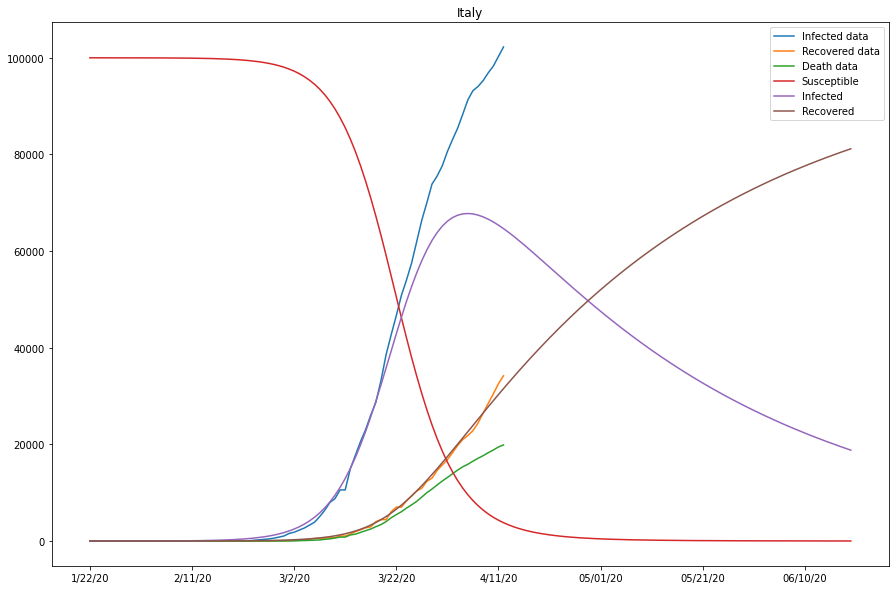

In [0]:
italy_df, italy_fig = italy_learner.train()

### For India

In [0]:
india_learner = Learner(country="India", loss= loss, i_0= 3)

      fun: 110.62898273512334
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.82308110e+08, -1.52831071e+03])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 216
      nit: 8
   status: 0
  success: True
        x: array([1.06300829e-06, 9.31734933e-03])
country=India, beta=0.00000106, gamma=0.00931735, r_0:0.00011409


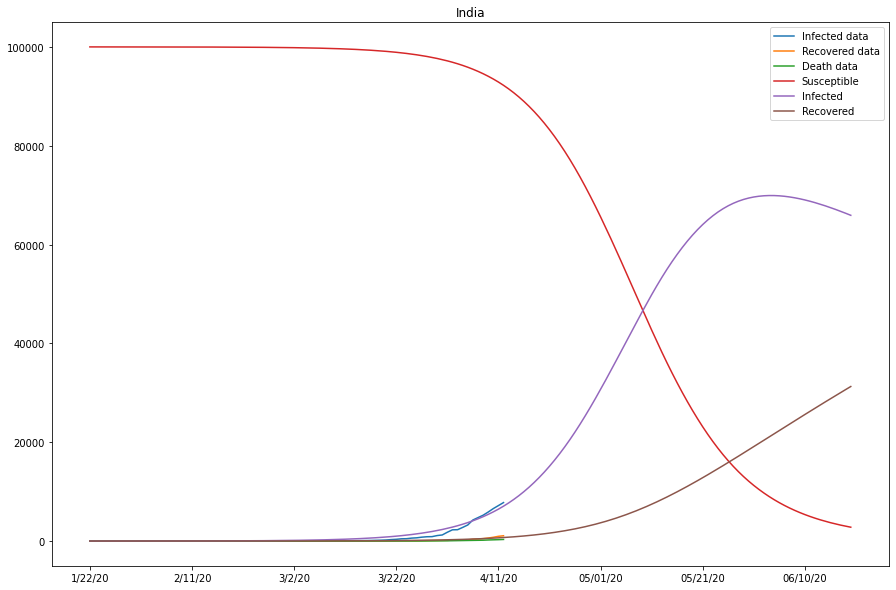

In [0]:
india_sir , india_sir_fig = india_learner.train()

#### Either read from file India.csv or directly from the dataframe returned in above function call

In [0]:
#india_sir = pd.read_csv('India.csv')

In [0]:
# Till 77 index, the data is upto 15th April
india_sir = india_sir[:77]

In [0]:
def plot_sir_prediction(title, df_sir, remove_series=[],yaxis_type="", yaxis_title=""):
    fig = go.Figure()
    title = title
    labels = ['Infected data','Recovered data', 'Death data', 'Susceptible','Infected','Recovered']
    colors = [color_arr[0], color_arr[8], color_arr[2], color_arr[3],color_arr[7], color_arr[16]]
    line_size = [2, 2, 2, 2, 2, 2]
    
    for index, data_series in enumerate(labels):
        if data_series not in remove_series:
            fig.add_trace(go.Scatter(x=df_sir.index, 
                                           y = df_sir[data_series], 
                                           name = labels[index],
                                           line=dict(
                                               color=colors[index], 
                                               width=line_size[index]),
                                           connectgaps=True,))
    xaxis= dict(
        title = "Date",
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickangle = 280,
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',),)
    yaxis = dict(
        title = "Case Count",
        showline = True,
        showgrid = True,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,)
    
    if yaxis_type!="":
        yaxis['type'] = yaxis_type
    
    if yaxis_title !="":
        yaxis['title'] = yaxis_title
    
    fig.update_layout(
        xaxis = xaxis,
        yaxis = yaxis,
        autosize=True,
        margin=dict(autoexpand=True,l=100,r=20,t=110,),
        showlegend=True)

    annotations = []

    # Title
    annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text=title,
                              font=dict(family='Arial',
                                        size=16,
                                        color='rgb(37,37,37)'),
                              showarrow=False))

    fig.update_layout(annotations=annotations)
    
    return fig
    

#### For Chart : SIR Model --  Covid-19 Transmission -- Prediction -- INDIA

In [0]:
fig_8 = plot_sir_prediction(title="SIR Model --  Covid-19 Transmission -- Prediction -- INDIA", df_sir= india_sir)
fig_8.show()

In [0]:
# to remove the "Susceptible" series just pass the series name to remove_series
fig_8 = plot_sir_prediction(
    title="SIR Model --  Covid-19 Transmission -- Prediction -- INDIA", 
    df_sir= india_sir,
    remove_series=['Susceptible'])

fig_8.show()


#### For Chart 9 : SIR Model --  Covid-19 Transmission -- Prediction -- INDIA | Case Count (Log Scale)

In [0]:
fig_9 = plot_sir_prediction(
    title="SIR Model --  Covid-19 Transmission -- Prediction -- INDIA", 
    df_sir= india_sir,
    remove_series=['Susceptible'],
    yaxis_type="log",
    yaxis_title="Case Count (Log Scale)")

fig_9.show()